# Preprocessing

In [16]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set_style('whitegrid')

%matplotlib inline
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## Load and inspect Data

### Data description

In [17]:
from preprocess import *
desc = description('data_description.txt')
desc.build_dict()
desc.clean_dict()
desc.clean_var_names()

In [18]:
list(desc.dict_.keys())[:5]

['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street']

In [19]:
desc.dict_['MSSubClass']

{'Description': ' Identifies the type of dwelling involved in the sale.',
 'Values': {'20': '1-STORY 1946 & NEWER ALL STYLES',
  '30': '1-STORY 1945 & OLDER',
  '40': '1-STORY W/FINISHED ATTIC ALL AGES',
  '45': '1-1/2 STORY - UNFINISHED ALL AGES',
  '50': '1-1/2 STORY FINISHED ALL AGES',
  '60': '2-STORY 1946 & NEWER',
  '70': '2-STORY 1945 & OLDER',
  '75': '2-1/2 STORY ALL AGES',
  '80': 'SPLIT OR MULTI-LEVEL',
  '85': 'SPLIT FOYER',
  '90': 'DUPLEX - ALL STYLES AND AGES',
  '120': '1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
  '150': '1-1/2 STORY PUD - ALL AGES',
  '160': '2-STORY PUD - 1946 & NEWER',
  '180': 'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
  '190': '2 FAMILY CONVERSION - ALL STYLES AND AGES'}}

### Dataframes

In [20]:
train_df = pd.read_csv('train.csv', index_col='Id')
test_df = pd.read_csv('test.csv', index_col='Id')
full_df = pd.concat([train_df, test_df], keys=['train', 'test'], axis=0, sort=False)

In [23]:
full_df.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
      Id                                                                    
train 1           60       RL         65.0     8450   Pave   NaN      Reg   
      2           20       RL         80.0     9600   Pave   NaN      Reg   
      3           60       RL         68.0    11250   Pave   NaN      IR1   
      4           70       RL         60.0     9550   Pave   NaN      IR1   
      5           60       RL         84.0    14260   Pave   NaN      IR1   

         LandContour Utilities LotConfig  ... PoolArea PoolQC Fence  \
      Id                                  ...                         
train 1          Lvl    AllPub    Inside  ...        0    NaN   NaN   
      2          Lvl    AllPub       FR2  ...        0    NaN   NaN   
      3          Lvl    AllPub    Inside  ...        0    NaN   NaN   
      4          Lvl    AllPub    Corner  ...        0    NaN   NaN   
      5          Lvl    AllPub       FR2  ...        0    NaN   NaN   

         MiscFeature MiscVal MoSold  YrSold  SaleType  SaleCondition  \
      Id                                                               
train 1          NaN       0      2    2008        WD         Normal   
      2          NaN       0      5    2007        WD         Normal   
      3          NaN       0      9    2008        WD         Normal   
      4          NaN       0      2    2006        WD        Abnorml   
      5          NaN       0     12    2008        WD         Normal   

          SalePrice  
      Id             
train 1    208500.0  
      2    181500.0  
      3    223500.0  
      4    140000.0  
      5    250000.0  

[5 rows x 80 columns]

In [27]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2919 entries, (train, 1) to (test, 2919)
Data columns (total 80 columns):
MSSubClass       2919 non-null int64
MSZoning         2915 non-null object
LotFrontage      2433 non-null float64
LotArea          2919 non-null int64
Street           2919 non-null object
Alley            198 non-null object
LotShape         2919 non-null object
LandContour      2919 non-null object
Utilities        2917 non-null object
LotConfig        2919 non-null object
LandSlope        2919 non-null object
Neighborhood     2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
BldgType         2919 non-null object
HouseStyle       2919 non-null object
OverallQual      2919 non-null int64
OverallCond      2919 non-null int64
YearBuilt        2919 non-null int64
YearRemodAdd     2919 non-null int64
RoofStyle        2919 non-null object
RoofMatl         2919 non-null object
Exterior1st      2918 non-null object
Exterior

## Clean data

### Determine Categorical, Ordinal, and Quantitative Variables

In [30]:
# view description of all variables except sale price
cols = list(full_df.columns)
cols.remove('SalePrice')
for col in cols:
    print(col + ':' + desc.dict_[col]['Description'] + '\n')
    try:
        for val in desc.dict_[col]['Values']:
            print(val + ' - ' + desc.dict_[col]['Values'][val])
    except KeyError:
        pass
    except TypeError:
        pass
    print('\n')

MSSubClass: Identifies the type of dwelling involved in the sale.

20 - 1-STORY 1946 & NEWER ALL STYLES
30 - 1-STORY 1945 & OLDER
40 - 1-STORY W/FINISHED ATTIC ALL AGES
45 - 1-1/2 STORY - UNFINISHED ALL AGES
50 - 1-1/2 STORY FINISHED ALL AGES
60 - 2-STORY 1946 & NEWER
70 - 2-STORY 1945 & OLDER
75 - 2-1/2 STORY ALL AGES
80 - SPLIT OR MULTI-LEVEL
85 - SPLIT FOYER
90 - DUPLEX - ALL STYLES AND AGES
120 - 1-STORY PUD (Planned Unit Development) - 1946 & NEWER
150 - 1-1/2 STORY PUD - ALL AGES
160 - 2-STORY PUD - 1946 & NEWER
180 - PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
190 - 2 FAMILY CONVERSION - ALL STYLES AND AGES


MSZoning: Identifies the general zoning classification of the sale.

A - Agriculture
C - Commercial
FV - Floating Village Residential
I - Industrial
RH - Residential High Density
RL - Residential Low Density
RP - Residential Low Density Park 
RM - Residential Medium Density


LotFrontage: Linear feet of street connected to property



LotArea: Lot size in square feet



Street:

In [31]:
# split variables into categorical, ordinal, quantitative
cat_cols = ['MSSubClass', 'MSZoning', 'Street', 'LandContour', 'LotConfig', 'Neighborhood', 
            'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 
            'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'CentralAir', 
            'Electrical', 'GarageType', 'MiscFeature', 'SaleType', 'SaleCondition', 'Alley']
ord_cols = ['LotShape', 'Utilities', 'LandSlope', 'OverallQual', 'OverallCond', 'ExterQual', 
            'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
            'HeatingQC', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 
            'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu'
            'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence']
quant_cols = ['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 
              'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 
              'GrLivArea', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 
              'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']

In [35]:
full_df['Fence'].unique()

array([nan, 'MnPrv', 'GdWo', 'GdPrv', 'MnWw'], dtype=object)

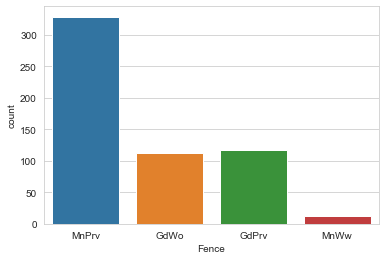

In [36]:
sns.countplot(full_df['Fence'])

### Drop obvious variables

In [32]:
# drop columns with too many missing values
notna_col_mask = ~ (full_df.isna().sum()/len(full_df) > 0.20)
notna_col_mask.loc['SalePrice'] = True
full_edit = full_df.loc[: , notna_col_mask]

# drop associated columns
full_edit = full_edit.drop(columns=['MiscVal'])
# drop outliers in OverallQual
idx = full_edit[(full_edit['OverallQual'] < 5) & (full_edit['SalePrice'] > 200000)].index[0][1]
full_edit = full_edit.drop(labels=[idx], axis=0, level='Id')
# drop outliers in GrLivArea
idx = full_edit[(full_edit['GrLivArea'] > 4000) & (full_edit['SalePrice'] < 300000)].index[0][1]
full_edit = full_edit.drop(labels=[idx], axis=0, level='Id')

In [33]:
# drop categorical variables with low number of class and extremely unbalanced distributions
unbalanced_cols = ['Street', 'Utilities']
full_edit = full_edit.drop(columns=unbalanced_cols)

### Impute Missing Values

#### Inspect train and test distributions of missing values

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 <a list of 28 Text xticklabel objects>)

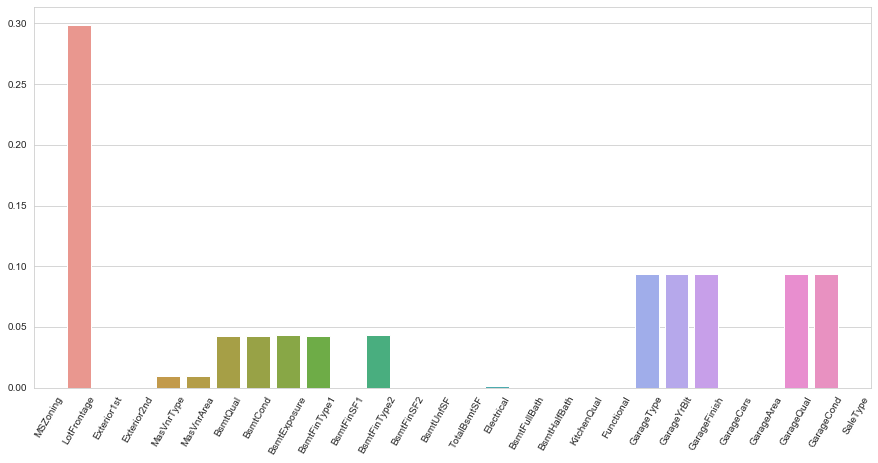

In [72]:
# plot distribution of missing train values
train_missing = full_edit.drop(columns=['SalePrice']).loc['train'].loc[ : , full_edit.isna().any()].isna().sum()
train_missing_dist = train_missing/train_missing.sum()
plt.figure(figsize=(15, 7))
sns.barplot(x=train_missing_dist.index, y=train_missing_dist.values)
plt.xticks(rotation=60)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 <a list of 28 Text xticklabel objects>)

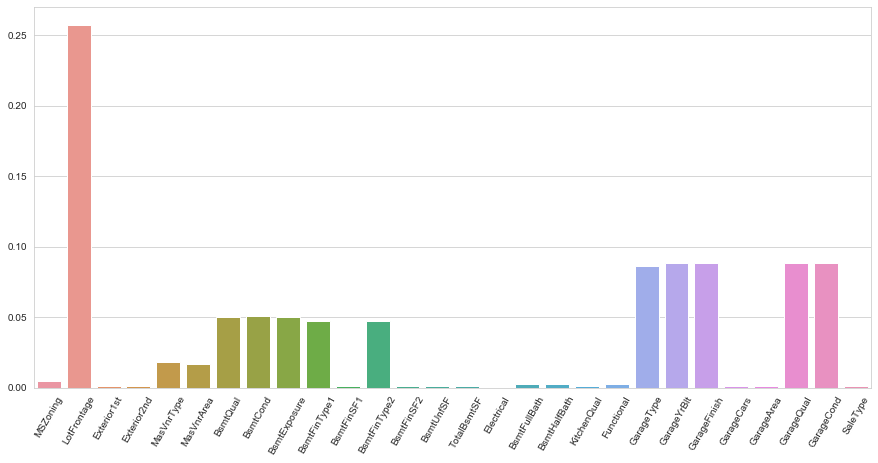

In [73]:
# plot distribution of missing test values
test_missing = full_edit.loc['test'].drop(columns=['SalePrice']).loc[ : , full_edit.isna().any()].isna().sum()
test_missing_dist = test_missing/test_missing.sum()
plt.figure(figsize=(15, 7))
sns.barplot(x=test_missing_dist.index, y=test_missing_dist.values)
plt.xticks(rotation=60)

In [74]:
# check which columns the training set is missing values that the test set isn't
train_missing_cols = set(full_edit.loc['train'].drop(columns=['SalePrice']).loc[ : , full_edit.isna().any()].columns)
test_missing_cols = set(full_edit.loc['test'].drop(columns=['SalePrice']).loc[ : , full_edit.isna().any()].columns)
train_missing_cols.difference(test_missing_cols)

set()

In [75]:
# check which columns the test set is missing values that the trainin set isn't
test_missing_cols.difference(train_missing_cols)

set()

In [76]:
# measure similarity of distributions using KL divergence

from scipy.stats import entropy
from itertools import product

# ignore one column where training set isn't missing a value but test set it

# joint entropy of missing train and test values
train_missing_dist.loc['Electrical'] = 0
kl = entropy(train_missing_dist, test_missing_dist)
f'KL divergence of test missing from train missing is {kl}'

'KL divergence of test missing from train missing is 0.03357306854134871'

#### Inspect columns with missing values

In [77]:
# df of columns missing values
null_df = full_edit.loc[:, full_edit.isna().any()]
null_df.isna().sum()

MSZoning           4
LotFrontage      486
Exterior1st        1
Exterior2nd        1
MasVnrType        24
MasVnrArea        23
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinSF1         1
BsmtFinType2      80
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Electrical         1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
GarageType       157
GarageYrBlt      159
GarageFinish     159
GarageCars         1
GarageArea         1
GarageQual       159
GarageCond       159
SaleType           1
SalePrice       1459
dtype: int64

In [78]:
print('Categorical columns with null entries')
null_cat_cols = list(set(null_df.columns).intersection(set(cat_cols)))
null_cat_cols

Categorical columns with null entries


['MSZoning',
 'GarageType',
 'MasVnrType',
 'Exterior2nd',
 'SaleType',
 'Electrical',
 'Exterior1st']

In [79]:
print('Ordinal columns with null entries')
null_ord_cols = list(set(null_df.columns).intersection(set(ord_cols)))
null_ord_cols

Ordinal columns with null entries


['BsmtExposure',
 'BsmtCond',
 'Functional',
 'BsmtFullBath',
 'BsmtQual',
 'GarageQual',
 'GarageCars',
 'KitchenQual',
 'GarageFinish',
 'GarageCond',
 'BsmtFinType1',
 'BsmtHalfBath']

In [80]:
# quantitative columns with null entries
print('Qualitative columns with null entries')
null_quant_cols = list(set(null_df.columns).intersection(set(quant_cols)))
null_quant_cols

Qualitative columns with null entries


['TotalBsmtSF',
 'GarageArea',
 'MasVnrArea',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'GarageYrBlt',
 'LotFrontage',
 'BsmtFinSF1']

#### Numerically encode ordinals

In [81]:
edit_ord_cols = list(set(full_edit.columns).intersection(ord_cols))
full_edit[edit_ord_cols].info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2919 entries, (train, 1) to (test, 2919)
Data columns (total 26 columns):
BsmtCond        2837 non-null object
BsmtQual        2838 non-null object
ExterQual       2919 non-null object
GarageCars      2918 non-null float64
GarageFinish    2760 non-null object
BedroomAbvGr    2919 non-null int64
BsmtFinType1    2840 non-null object
PavedDrive      2919 non-null object
FullBath        2919 non-null int64
BsmtExposure    2837 non-null object
OverallQual     2919 non-null int64
GarageCond      2760 non-null object
LotShape        2919 non-null object
OverallCond     2919 non-null int64
TotRmsAbvGrd    2919 non-null int64
BsmtHalfBath    2917 non-null float64
HalfBath        2919 non-null int64
Functional      2917 non-null object
GarageQual      2760 non-null object
KitchenQual     2918 non-null object
ExterCond       2919 non-null object
Fireplaces      2919 non-null int64
BsmtFullBath    2917 non-null float64
LandSlope       2919 non-null

In [82]:
from numpy import nan

ords = {col:None for col in edit_ord_cols if full_edit[col].dtype == 'O'}

In [83]:
ords['GarageCond'] = {nan: 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
ords['BsmtCond'] = ords['GarageCond'].copy()
ords['BsmtCond'].pop('Ex')
ords['LandSlope'] = {'Gtl': 0, 'Mod': 1, 'Sev': 2}
ords['PavedDrive'] = {'N': 0, 'P': 1, 'Y': 2}
ords['GarageFinish'] = {nan: 0, 'Unf': 1, 'RFn': 2, 'Fin': 3}
ords['BsmtQual'] = {nan: 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4}
ords['GarageQual'] = ords['GarageCond'].copy()
ords['LotShape'] = {'Reg': 0, 'IR1': 1, 'IR2': 2, 'IR3': 3}
ords['Functional'] = {name:i for (i, name) in enumerate(reversed(full_edit['Functional'].unique()[:-1]))}
ords['Functional'][nan] = nan
ords['ExterCond'] = ords['GarageCond'].copy()
ords['ExterQual'] = {'Fa': 0, 'TA': 1, 'Gd': 2, 'Ex': 3}
ords['HeatingQC'] = ords['GarageCond'].copy()
ords['KitchenQual'] = ords['BsmtQual'].copy()
ords['BsmtFinType1'] = {nan: 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6}
ords['BsmtFinType2'] = ords['BsmtFinType1'].copy()
ords['BsmtExposure'] = {nan: 0, 'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4}

In [84]:
ords

{'BsmtCond': {nan: 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4},
 'BsmtQual': {nan: 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4},
 'ExterQual': {'Fa': 0, 'TA': 1, 'Gd': 2, 'Ex': 3},
 'GarageFinish': {nan: 0, 'Unf': 1, 'RFn': 2, 'Fin': 3},
 'BsmtFinType1': {nan: 0,
  'Unf': 1,
  'LwQ': 2,
  'Rec': 3,
  'BLQ': 4,
  'ALQ': 5,
  'GLQ': 6},
 'PavedDrive': {'N': 0, 'P': 1, 'Y': 2},
 'BsmtExposure': {nan: 0, 'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4},
 'GarageCond': {nan: 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
 'LotShape': {'Reg': 0, 'IR1': 1, 'IR2': 2, 'IR3': 3},
 'Functional': {'Sev': 0,
  'Maj2': 1,
  'Mod': 2,
  'Min2': 3,
  'Maj1': 4,
  'Min1': 5,
  'Typ': 6,
  nan: nan},
 'GarageQual': {nan: 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
 'KitchenQual': {nan: 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4},
 'ExterCond': {nan: 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
 'LandSlope': {'Gtl': 0, 'Mod': 1, 'Sev': 2},
 'HeatingQC': {nan: 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
 'BsmtFinType2

In [85]:
def return_val(col):
    def f(x):
        return ords[col][x]
    return f

for col in ords:
    full_edit.loc[:, col] = full_edit[col].map(return_val(col))

In [86]:
full_edit[edit_ord_cols].info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2919 entries, (train, 1) to (test, 2919)
Data columns (total 26 columns):
BsmtCond        2919 non-null int64
BsmtQual        2919 non-null int64
ExterQual       2919 non-null int64
GarageCars      2918 non-null float64
GarageFinish    2919 non-null int64
BedroomAbvGr    2919 non-null int64
BsmtFinType1    2919 non-null int64
PavedDrive      2919 non-null int64
FullBath        2919 non-null int64
BsmtExposure    2919 non-null int64
OverallQual     2919 non-null int64
GarageCond      2919 non-null int64
LotShape        2919 non-null int64
OverallCond     2919 non-null int64
TotRmsAbvGrd    2919 non-null int64
BsmtHalfBath    2917 non-null float64
HalfBath        2919 non-null int64
Functional      2917 non-null float64
GarageQual      2919 non-null int64
KitchenQual     2919 non-null int64
ExterCond       2919 non-null int64
Fireplaces      2919 non-null int64
BsmtFullBath    2917 non-null float64
LandSlope       2919 non-null int64
Kitc

#### Impute for columns with low numbers of missing values by hand

In [87]:
# counts of missing categoricals
null_cat_counts = full_edit[null_cat_cols].isna().sum()
null_cat_counts

MSZoning         4
GarageType     157
MasVnrType      24
Exterior2nd      1
SaleType         1
Electrical       1
Exterior1st      1
dtype: int64

In [88]:
# counts of missing ordinals
null_ord_counts = full_edit[null_ord_cols].isna().sum()
null_ord_counts

BsmtExposure    0
BsmtCond        0
Functional      2
BsmtFullBath    2
BsmtQual        0
GarageQual      0
GarageCars      1
KitchenQual     0
GarageFinish    0
GarageCond      0
BsmtFinType1    0
BsmtHalfBath    2
dtype: int64

In [89]:
# counts of missing quantitatives
null_quant_counts = full_edit[null_quant_cols].isna().sum()
null_quant_counts

TotalBsmtSF      1
GarageArea       1
MasVnrArea      23
BsmtFinSF2       1
BsmtUnfSF        1
GarageYrBlt    159
LotFrontage    486
BsmtFinSF1       1
dtype: int64

In [90]:
# impute columns with low number of missing vals by hand

cat_hi_missing_cols = null_cat_counts[null_cat_counts > 4].index
cat_lo_missing_cols = list(set(null_cat_cols).difference(set(cat_hi_missing_cols)))

ord_hi_missing_cols = null_ord_counts[null_ord_counts > 2].index
ord_lo_missing_cols = list(set(null_ord_cols).difference(set(ord_hi_missing_cols)))

quant_hi_missing_cols = null_quant_counts[null_quant_counts > 1].index
quant_lo_missing_cols = list(set(null_quant_cols).difference(set(quant_hi_missing_cols)))

missing_values = {**{col: full_edit[col].value_counts().idxmax() for col in cat_lo_missing_cols}, 
                  **{col: full_edit[col].median() for col in ord_lo_missing_cols + quant_lo_missing_cols}
                 }

full_edit = full_edit.fillna(value=missing_values)

In [91]:
# update null df
null_df = full_edit.loc[:, full_edit.isna().any()]
null_df.isna().sum()

LotFrontage     486
MasVnrType       24
MasVnrArea       23
GarageType      157
GarageYrBlt     159
SalePrice      1459
dtype: int64

In [115]:
not 0

True

In [92]:
# update edit columns types
edit_cat_cols = list(set(full_edit.columns).intersection(cat_cols))
edit_ord_cols = list(set(full_edit.columns).intersection(ord_cols))
edit_quant_cols = list(set(full_edit.columns).intersection(quant_cols))

In [93]:
# update null columns types
null_cat_cols = list(set(null_df.columns).intersection(set(edit_cat_cols)))
null_ord_cols = list(set(null_df.columns).intersection(set(edit_ord_cols)))
null_quant_cols = list(set(null_df.columns).intersection(set(edit_quant_cols)))

#### Impute missing categorical values with multinomial regression

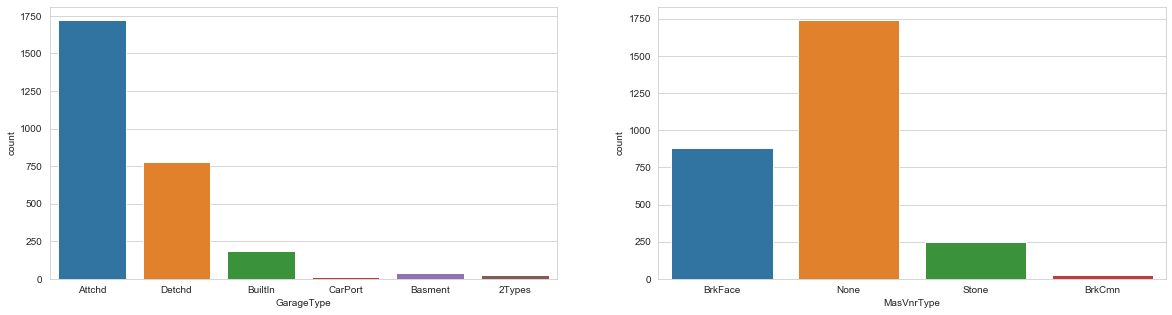

In [94]:
fig, _ = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
for (i, col) in enumerate(null_cat_cols):
    plt.subplot(1, 2, i + 1)
    sns.countplot(x=col, data=full_edit)

##### Impute `MasVnrType`

In [95]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

%run house_prices

NameError: name 'XGBClassifier' is not defined

<Figure size 432x288 with 0 Axes>

In [96]:
# get dummies for all variables except one we're imputing
dummy_columns = list(set(edit_cat_cols).difference({'MasVnrType'}))

# drop Sales price columns since were using full train + test and half is missing
MasVnrType_imp_df = pd.get_dummies(full_edit, columns=dummy_columns).drop(columns=['SalePrice'])

# drop null variables for logistic regression
data = MasVnrType_imp_df.dropna()

# predictors and reponse
X, y = data.drop(columns=['MasVnrType']), data['MasVnrType']

# numerically encode response
MasVnrType_le = LabelEncoder()
y = MasVnrType_le.fit_transform(y)

# scale
X_sc = MinMaxScaler().fit_transform(X)

In [97]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier()
%timeit -n1 -r1 xgb_clf.fit(X_sc, y)

3.94 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [98]:
np.mean(cross_val_score(estimator=xgb_clf, 
                                                  X=X_sc, 
                                                  y=y,
                                                  cv=10,
                                                  scoring='accuracy',
                                                  n_jobs=-1,
                                                 )              
                                 )

0.9329237991734498

In [99]:
# df for prediction
MasVnrType_pred_df = MasVnrType_imp_df.drop(columns=['MasVnrType'])

# fill quantitative columns with median values so estimator can predict
missing_quant_values = {col: full_edit[col].dropna().median() for col in null_quant_cols}
MasVnrType_pred_df = MasVnrType_pred_df.fillna(value=missing_quant_values)

# scale
X_pred_df = MinMaxScaler().fit_transform(MasVnrType_pred_df)

# impute MasVnrType values
y_pred = xgb_clf.predict(X_pred_df)
full_edit.loc[:, 'MasVnrType'] = MasVnrType_le.inverse_transform(y_pred)

##### Impute `GarageType`

In [101]:
# get dummies for all variables except one we're imputing
dummy_columns = list(set(edit_cat_cols).difference({'GarageType'}))

# drop Sales price columns since were using full train + test and half is missing
GarageType_imp_df = pd.get_dummies(full_edit, columns=dummy_columns).drop(columns=['SalePrice'])

# drop null variables for logistic regression
data = GarageType_imp_df.dropna()

# predictors and reponse
X, y = data.drop(columns=['GarageType']), data['GarageType']

# numerically encode response
GarageType_le = LabelEncoder()
y = GarageType_le.fit_transform(y)

# scale
X_sc = MinMaxScaler().fit_transform(X)

In [102]:
xgb_clf = XGBClassifier()
%timeit -n1 -r1 xgb_clf.fit(X_sc, y)

6.8 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [104]:
np.mean(cross_val_score(estimator=xgb_clf, 
                                                  X=X_sc, 
                                                  y=y,
                                                  cv=10,
                                                  scoring='accuracy',
                                                  n_jobs=-1,
                                                 )              
                                 )

0.8564016958084497

In [105]:
# df for prediction
GarageType_pred_df = GarageType_imp_df.drop(columns=['GarageType'])

# fill quantitative columns with median values so estimator can predict
GarageType_pred_df = GarageType_pred_df.fillna(value=missing_quant_values)

# scale
X_pred_df = MinMaxScaler().fit_transform(GarageType_pred_df)

# impute GarageType values
y_pred = xgb_clf.predict(X_pred_df)
full_edit.loc[:, 'GarageType'] = GarageType_le.inverse_transform(y_pred)

#### Impute missing ordinal and quantitative with predictive mean matching

In [106]:
full_edit.loc[:, full_edit.isna().any()].isna().sum()

LotFrontage     486
MasVnrArea       23
GarageYrBlt     159
SalePrice      1459
dtype: int64

In [107]:
from statsmodels.imputation.mice import MICEData

data = pd.get_dummies(full_edit, columns=edit_cat_cols)
cols = edit_ord_cols + edit_quant_cols + ['SalePrice']
data.loc[:, cols] = (data[cols] - data[cols].min())/(data[cols].max() - data[cols].min())

# handle problematic column names
rename_cols = {'1stFlrSF': 'FirstFlrSF', '2ndFlrSF': 'SecondFlrSF', '3SsnPorch': 'ThreeSsnPorch',
               'HouseStyle_1.5Fin': 'HouseStyle_One_and_half_Fin', 
               'HouseStyle_1.5Unf': 'HouseStyle_One_and_half_Unf',
               'HouseStyle_2.5Fin': 'HouseStyle_Two_and_half_Fin', 
               'HouseStyle_2.5Unf': 'HouseStyle_Two_and_half_Unf', 
               'Exterior2nd_Brk Cmn': 'Exterior2nd_BrkCmn',
               'Exterior2nd_Wd Shng': 'Exterior2nd_WdShng',
               'Exterior2nd_Wd Sdng': 'Exterior2nd_WdSdng',
               'Exterior1st_Wd Sdng': 'Exterior1st_WdSdng',
               'MSZoning_C (all)': 'MSZoning_C',
               'RoofMatl_Tar&Grv': 'RoofMatl_TarGrv'
               }
data = data.rename(index=str, columns=rename_cols)

In [108]:
data.loc[ : , data.isna().any()].isna().sum()

LotFrontage     486
MasVnrArea       23
GarageYrBlt     159
SalePrice      1459
dtype: int64

In [109]:
# create MICED data instance
data_imp = MICEData(data, perturbation_method='boot')

# impute missing quantitatives
%timeit -n1 -r1 data_imp.update_all(n_iter=10)

1min 2s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


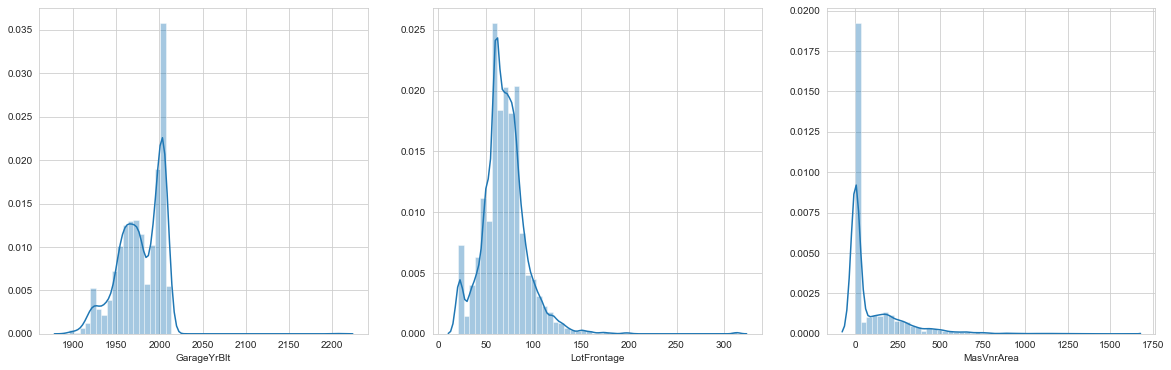

In [110]:
fig, _ = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))
for (i, col) in enumerate(null_quant_cols):
    plt.subplot(1, 3, i + 1)
    sns.distplot(full_edit[col].dropna())

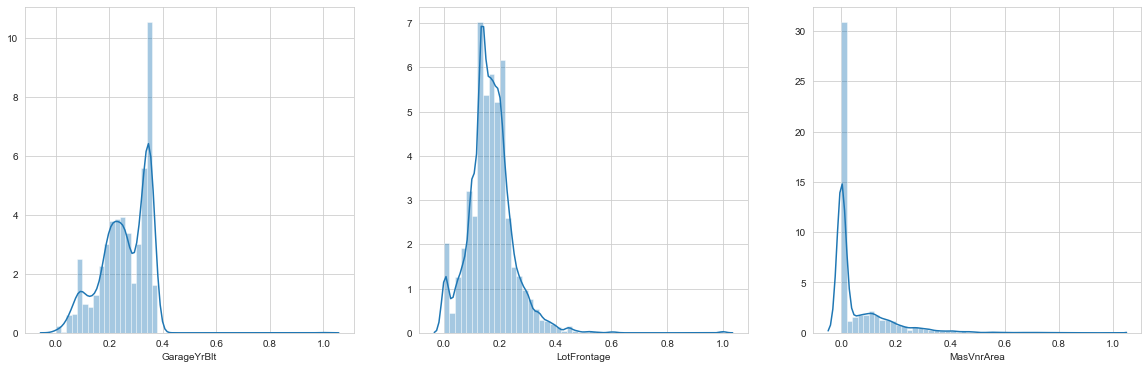

In [111]:
fig, _ = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))
for (i, col) in enumerate(null_quant_cols):
    plt.subplot(1, 3, i + 1)
    sns.distplot(data_imp.data[col])

In [112]:
for col in null_quant_cols:
    data.loc[: ,  col] = data_imp.data[col].values
    
data.loc[ : , data.isna().any()].isna().sum()

SalePrice    1459
dtype: int64

#### ALTERNATIVE: Impute all missing values with `xgboost`